# Cleaning Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("Data_Train (1).xlsx")

In [3]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [4]:
data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [5]:
data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

We will define functions to remove the units from the Mileage, Engine and Power columns

In [6]:
def unit_remover(value):
        if type(value) != float:
            return float(value.split()[0])
        else:
            return value


In [7]:
data["Mileage"] = data["Mileage"].apply(unit_remover)

In [8]:
data["Engine"] = data["Engine"].apply(unit_remover)

Power requires a separate function because not all null values are stored as NaN. Some instead have the string "null bhp".

In [9]:
def power_unit_remover(value):
    if type(value) != float:
        if value != "null bhp":
            return float(value.split()[0])
        else:
            return np.nan
    else:
            return value

In [10]:
data["Power"] = data["Power"].apply(power_unit_remover)

In [11]:
data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

data.isnull().sum()

We will now drop rows which have null values in the Power,Seats and Engine columns (It must contain null values in all three columns not just any one.)

In [12]:
data.drop(data[data.isnull()["Power"] & data.isnull()["Seats"] & data.isnull()["Engine"]].index,inplace = True)

In [13]:
data.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                 0
Power                107
Seats                  6
Price                  0
dtype: int64

In [14]:
data.mean()

Year                  2013.383085
Kilometers_Driven    58684.183186
Mileage                 18.175265
Engine                1621.276450
Power                  113.253050
Seats                    5.278735
Price                    9.496263
dtype: float64

In [15]:
data.median()

Year                  2014.00
Kilometers_Driven    53000.00
Mileage                 18.16
Engine                1493.00
Power                   97.70
Seats                    5.00
Price                    5.65
dtype: float64

Since number of null values is less when compared to number of data points , we can impute using median or mean. Since seats are a discrete variable we are using median. For the rest, there isn't too much of a difference between the mean and median value

In [16]:
data["Seats"].fillna(data["Seats"].median(),inplace = True)

In [17]:
data["Power"].fillna(data["Power"].median(),inplace = True)

In [18]:
data["Mileage"].fillna(data["Mileage"].median(),inplace = True)

In [19]:
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [20]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [21]:
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

Engine                61
Fuel_Type              0
Kilometers_Driven    201
Location               0
Mileage               71
Name                   0
Owner_Type             0
Power                239
Price                716
Seats                963
Transmission           0
Year                  46
dtype: int64

These are the column wise number of outliers

In [22]:
data[data["Seats"]==0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197.0,97.7,0.0,18.0


There are no cars with 0 seats so this value can be changed.

In [23]:
data["Seats"][3999] = 4.0

<ipython-input-23-b458d24376e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Seats"][3999] = 4.0


We will now create two separate columns called Brand and Model from the Name column and add it to our original data

In [24]:
names = data["Name"].copy()
names.reset_index(inplace = True,drop = True)


In [25]:
names = names.str.replace("Land Rover","Land-Rover")
names = names.str.replace("ISUZU","Isuzu")


In [26]:
brands = names.apply(lambda name:name.split()[0])
models = names.apply(lambda name:" ".join(name.split()[1:]))
brand_and_model = pd.DataFrame(zip(brands,models),columns = ["Brand","Model"])

In [27]:
data.reset_index(inplace = True,drop = True)

In [28]:
new_data = pd.concat([brand_and_model,data],axis = 1)
new_data["Name"] = names

In [29]:
new_data.head()

,Brand,Model,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Wagon R LXI CNG,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Creta 1.6 CRDi SX Option,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Jazz V,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Ertiga VDI,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,A4 New 2.0 TDI Multitronic,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


Now we can drop the name column

In [30]:
new_data.drop(["Name"],inplace = True,axis = 1)

In [31]:
new_data.head()

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


 # Univariate Analysis 

In [32]:
new_data.dtypes

Brand                 object
Model                 object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

Categorical data: Brand, Model, Location, Year, Fuel_Type, Transmission, Owner_Type

Numerical Data: Kilometers_Driven, Mileage, Engine, Power, Seats

**Univariate analysis of Categorical data**

Maruti           1200
Hyundai          1100
Honda             602
Toyota            410
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               262
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land-Rover         57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               25
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Isuzu               3
Force               3
Ambassador          1
Bentley             1
Smart               1
Lamborghini         1
Name: Brand, dtype: int64


<AxesSubplot:>

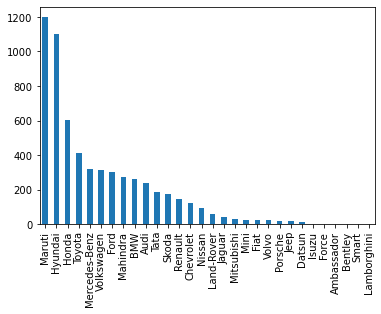

In [33]:
#Brand
print(new_data["Brand"].value_counts())
new_data["Brand"].value_counts().plot.bar()

Mumbai        786
Hyderabad     741
Kochi         648
Coimbatore    634
Pune          613
Delhi         549
Kolkata       531
Chennai       493
Jaipur        411
Bangalore     354
Ahmedabad     223
Name: Location, dtype: int64


<AxesSubplot:ylabel='Location'>

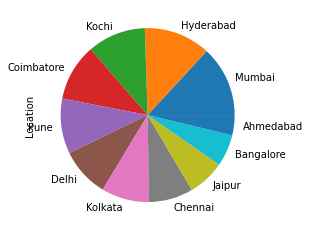

In [34]:
#Location
print(new_data["Location"].value_counts())
new_data["Location"].value_counts().plot.pie()

2014    795
2015    742
2016    741
2013    648
2017    586
2012    573
2011    462
2010    340
2018    298
2009    196
2008    171
2007    123
2019    102
2006     75
2005     56
2004     29
2003     15
2002     14
2001      7
1998      4
2000      4
1999      2
Name: Year, dtype: int64


<AxesSubplot:>

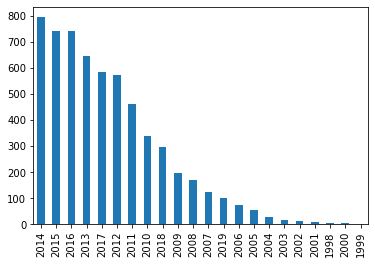

In [35]:
#Year
print(new_data["Year"].value_counts())
new_data["Year"].value_counts().plot.bar()

Diesel      3197
Petrol      2718
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64


<AxesSubplot:>

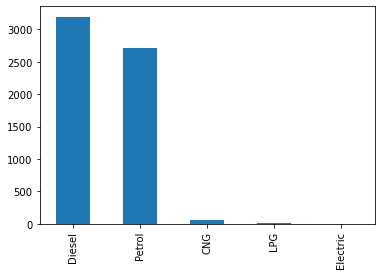

In [36]:
#Fuel type
print(new_data["Fuel_Type"].value_counts())
new_data["Fuel_Type"].value_counts().plot.bar()

Manual       4271
Automatic    1712
Name: Transmission, dtype: int64


<AxesSubplot:ylabel='Transmission'>

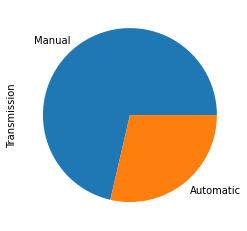

In [37]:
#Transmission Type
print(new_data["Transmission"].value_counts())
new_data["Transmission"].value_counts().plot.pie()

First             4907
Second             957
Third              111
Fourth & Above       8
Name: Owner_Type, dtype: int64


<AxesSubplot:>

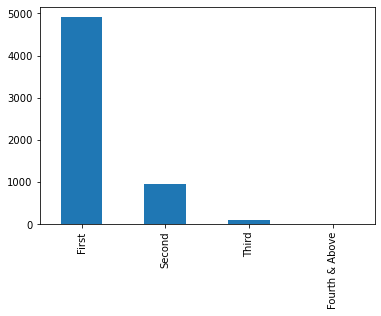

In [38]:
#Owner Type
print(new_data["Owner_Type"].value_counts())
new_data["Owner_Type"].value_counts().plot.bar()

**CONCLUSIONS:**

1. Maximim no. of cars are Maruti and Hyundai brand, whereas Lamborghini,Bentley,Ambassador,Smart brand cars are only 1.
2. Maximum no. of cars are available in Mumbai for sale and least in Ahmedabad.
3. Maximum no. of cars belong to 2014, 2015 edition.
4. Diesel and Petrol cars are maximum available.
5. Manual tansmission car are more than automatic.
6. First hand owners are maximum.


**Univariate analysis of numerical variables**

In [39]:
new_data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5983.000000,5.983000e+03,5983.00000,5983.000000,5983.000000,5983.000000,5983.000000
mean,2013.383085,5.868418e+04,18.17526,1621.276450,112.974899,5.279124,9.496263
std,3.249102,9.150334e+04,4.52601,601.355233,53.430733,0.805766,11.200462
min,1998.000000,1.710000e+02,0.00000,72.000000,34.200000,2.000000,0.440000
25%,2011.000000,3.396550e+04,15.20000,1198.000000,77.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.16000,1493.000000,97.700000,5.000000,5.650000
75%,2016.000000,7.300000e+04,21.10000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.54000,5998.000000,560.000000,10.000000,160.000000


<AxesSubplot:xlabel='Price'>

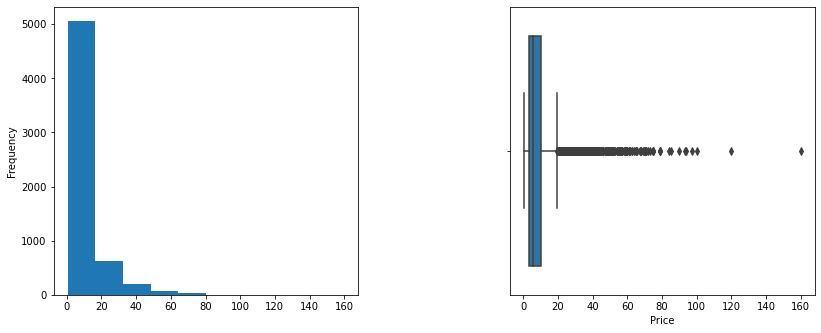

In [40]:
#Price
plt.figure(figsize=(30,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.2)

plt.subplot(141)
new_data["Price"].plot.hist()

plt.subplot(142)
sns.boxplot(data=new_data, x="Price")


We can infer from here that the price of cars mostly lies in range 10-20 lakhs because its the minimum range and people prefer to buy in low price.Some prices are very  high may be because they have high mileage, good engine, nice brand etc.

<AxesSubplot:ylabel='Frequency'>

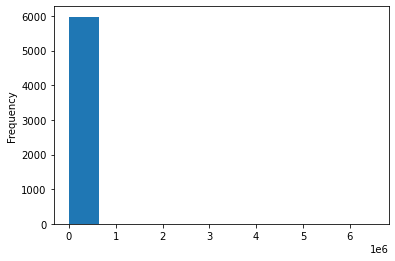

In [41]:
#kilometers driven
new_data["Kilometers_Driven"].plot.hist()

<AxesSubplot:xlabel='Kilometers_Driven'>

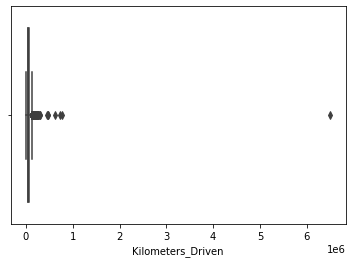

In [42]:
sns.boxplot(data=new_data, x="Kilometers_Driven")

From the above graphs we can infer that maximum no. of cars less than 1000000 ,the remaining has large value and they are equally important in predicting the price of the car.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

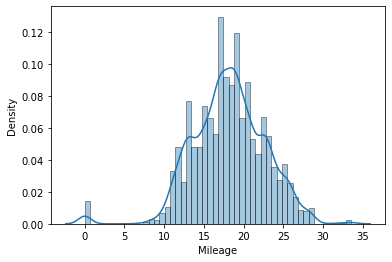

In [43]:
sns.distplot(data["Mileage"], kde=True, hist=True, hist_kws=dict(edgecolor="k", linewidth=1))

<AxesSubplot:xlabel='Mileage'>

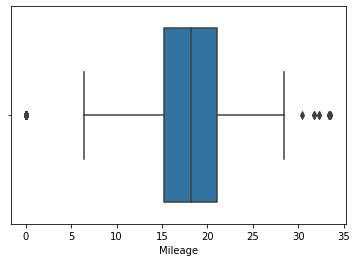

In [44]:
sns.boxplot(data=new_data, x="Mileage")

We can infer here that cars having mileage in range 10-25 are maximum.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Engine', ylabel='Density'>

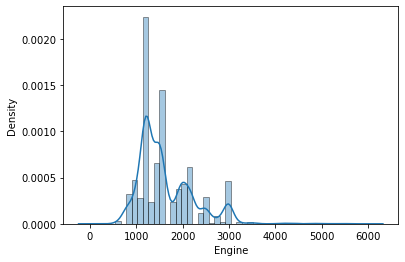

In [45]:
sns.distplot(data["Engine"], kde=True, hist=True, hist_kws=dict(edgecolor="k", linewidth=1))

<AxesSubplot:xlabel='Engine'>

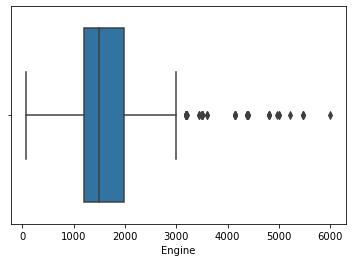

In [46]:
sns.boxplot(data=new_data, x="Engine")

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Power', ylabel='Density'>

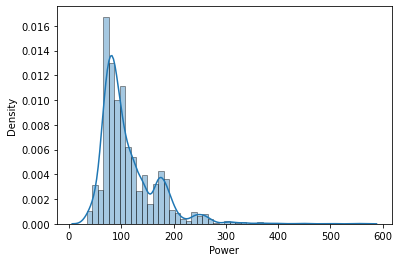

In [47]:
sns.distplot(data["Power"], kde=True, hist=True, hist_kws=dict(edgecolor="k", linewidth=1))

<AxesSubplot:xlabel='Power'>

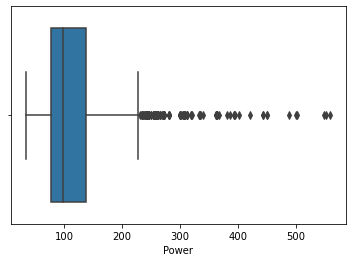

In [48]:
sns.boxplot(data=new_data, x="Power")

<AxesSubplot:xlabel='Seats', ylabel='count'>

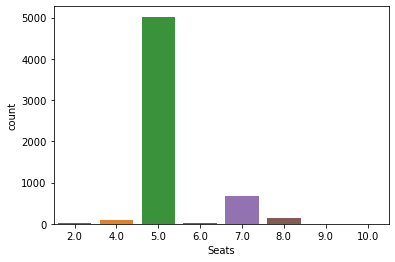

In [49]:
sns.countplot(x="Seats", data=new_data)

Maximum cars have the seats capacity of 5.

# Bivariate Analysis

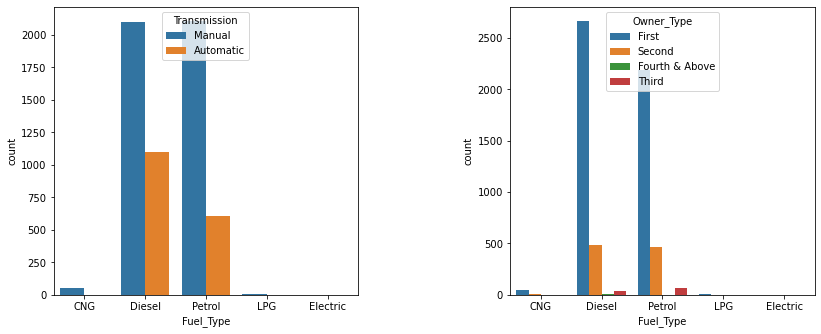

In [50]:
#categorical-categorical Analysis
#fuel type-transimission
plt.figure(figsize=(30,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.2)

plt.subplot(141)
plt1=sns.countplot(x="Fuel_Type", data=new_data, hue="Transmission")

#fuel type - owner type
plt.subplot(142)
plt2=sns.countplot(x="Fuel_Type", data=new_data, hue="Owner_Type")

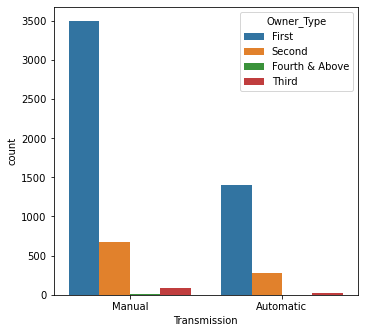

In [51]:
#transimission-owner
plt.figure(figsize=(30,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.2)

plt.subplot(141)
plt1=sns.countplot(x="Transmission", data=new_data, hue="Owner_Type")



In [52]:
new_data.head()

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


Comparison of year with mode of transmission and owner_type


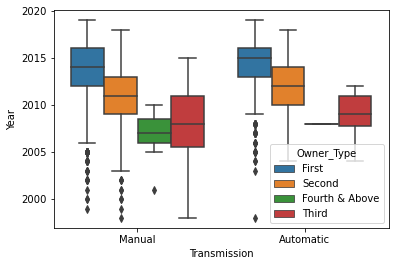

In [53]:
sns.boxplot(y='Year',x='Transmission',hue='Owner_Type',data=new_data)
print('Comparison of year with mode of transmission and owner_type')

In both the modes of transmission first hand cars are more feasible because  they are newer hence greater performance rates as explained below.

<AxesSubplot:xlabel='Transmission', ylabel='Mileage'>

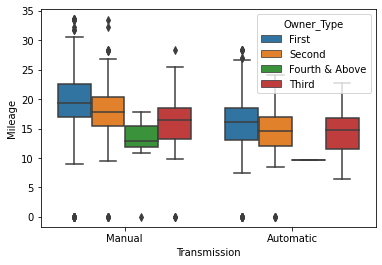

In [54]:
new_data['First_owner']=np.where(new_data['Owner_Type']=='First',1,0)
sns.boxplot(y='Mileage',x='Transmission',hue='Owner_Type',data=new_data)

More mileage of car is given in the order of Owner_Type- 1>2>3>4

<AxesSubplot:xlabel='Transmission', ylabel='Power'>

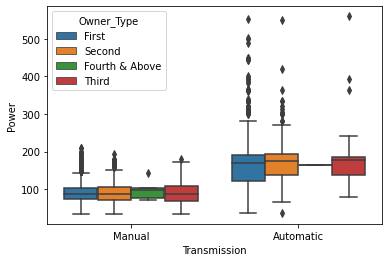

In [55]:
sns.boxplot(y='Power',x='Transmission',hue='Owner_Type',data=new_data)

Power of different cars are not much variated in both the transmission mode but fourth and above owner_type clearly has least power.

Brand                           Volvo
Model                redi-GO T Option
Location                         Pune
Year                             2019
Kilometers_Driven             6500000
Fuel_Type                      Petrol
Transmission                   Manual
Owner_Type                      Third
Mileage                         33.54
Engine                           5998
Power                             560
Seats                              10
Price                             160
First_owner                         1
dtype: object
Since maximum kilometers_driven is 6500000 so it can be considered as an outlier because it has travelled a lot of distance so it is not applicable for selling.


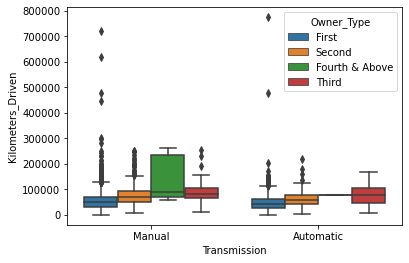

In [56]:
new=new_data[new_data.Kilometers_Driven<6500000]
sns.boxplot(y='Kilometers_Driven',x='Transmission',hue='Owner_Type',data=new)
print(new_data.max())
print('Since maximum kilometers_driven is 6500000 so it can be considered as an outlier because it has travelled a lot of distance so it is not applicable for selling.')

First hand cars belong to least distance covered hence should be more costly.

Comparison of fuel type with year of manufacturing and owner type-


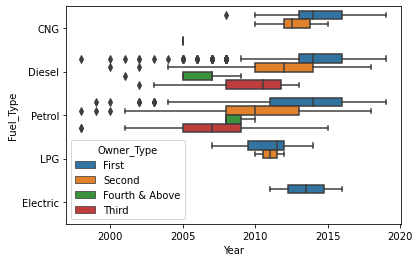

In [57]:
sns.boxplot(y='Fuel_Type',x='Year',hue='Owner_Type',data=new)
print('Comparison of fuel type with year of manufacturing and owner type-')

From the above data it can be inferred that fuel type cannot be taken as a solid basis of comparison with time because some of the fuel types have not been used in earlier cars so their performance affect cannot be compared with time.

Comparison of seats with transmission and owner type-


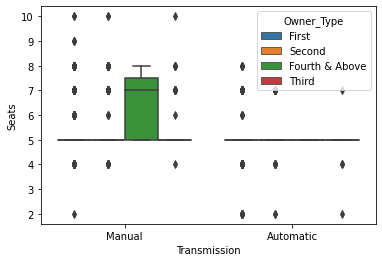

In [58]:
sns.boxplot(y='Seats',x='Transmission',hue='Owner_Type',data=new_data)
print('Comparison of seats with transmission and owner type-')

The above comparison does not infer much it indicates that the older cars must have more no. of seats but much cannot be commpared with this.

Comparison of price with transmission and owner type-


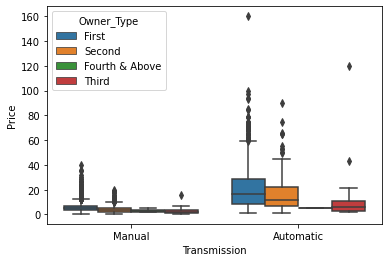

In [59]:
sns.boxplot(y='Price',x='Transmission',hue='Owner_Type',data=new_data)
print('Comparison of price with transmission and owner type-')

The above data infers that older cars were originally cheap and manual cars are cheaper than the automatic ones.

Comparison of Engine with transmission and owner type-


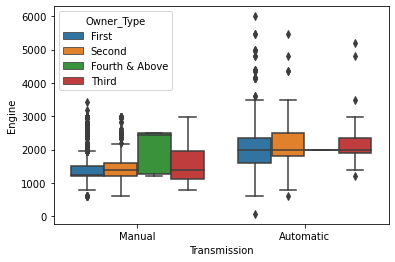

In [60]:
sns.boxplot(y='Engine',x='Transmission',hue='Owner_Type',data=new_data)
print('Comparison of Engine with transmission and owner type-')

Comparison of Transmission with year and owner type-


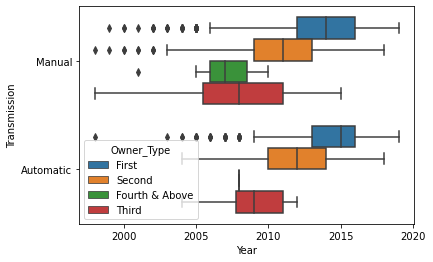

In [61]:
sns.boxplot(y='Transmission',x='Year',hue='Owner_Type',data=new_data)
print('Comparison of Transmission with year and owner type-')

The above data infers that mode of transmission cannot be considered as a major factor in cost prediction, it could be considered in people's popularity, because it does not majorly shows the difference in performance of car with time as automatic cars were not used in previous years.

#  Encoding String Categorical Data

In [62]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

new_data['Brand'] = labelencoder.fit_transform(new_data['Brand'])
new_data['Model'] = labelencoder.fit_transform(new_data['Model'])
new_data['Location'] = labelencoder.fit_transform(new_data['Location'])
new_data['Fuel_Type'] = labelencoder.fit_transform(new_data['Fuel_Type'])
new_data['Transmission'] = labelencoder.fit_transform(new_data['Transmission'])
new_data['Owner_Type'] = labelencoder.fit_transform(new_data['Owner_Type'])

In [63]:
new_data.head()

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,First_owner
0,17,1628,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75,1
1,10,457,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50,1
2,9,923,2,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,4.50,1
3,17,626,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00,1
4,1,95,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74,0


# Train-Test Split and Scaling

In [64]:
x = new_data.iloc[:,0:12]
y = new_data.iloc[:,12]

In [65]:
x

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,17,1628,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0
1,10,457,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0
2,9,923,2,2011,46000,4,1,0,18.20,1199.0,88.70,5.0
3,17,626,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0
4,1,95,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5978,17,1465,4,2014,27365,1,1,0,28.40,1248.0,74.00,5.0
5979,10,1709,6,2015,100000,1,1,0,24.40,1120.0,71.00,5.0
5980,16,1735,6,2012,55000,1,1,2,14.00,2498.0,112.00,8.0
5981,17,1635,8,2013,46000,4,1,0,18.90,998.0,67.10,5.0


In [66]:
y

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
5978     4.75
5979     4.00
5980     2.90
5981     2.65
5982     2.50
Name: Price, Length: 5983, dtype: float64

# Train-Test Split and Scaling

In [67]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=1)

In [68]:
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()
x_train = norm.fit_transform(x_train)
x_test = norm.fit_transform(x_test)

### Applying Regression algorithms

In [69]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [70]:
from sklearn.tree import DecisionTreeRegressor
reg1 = DecisionTreeRegressor()
reg1.fit(x_train,y_train)
y_pred1 = reg1.predict(x_test)
r2_1 = r2_score(y_test , y_pred1)
rmse1 = sqrt(mean_squared_error(y_test, y_pred1))
print(r2_1)
print(rmse1)

0.7321249880703569
5.700775670789292


In [71]:
from sklearn.linear_model import LinearRegression
reg2 = LinearRegression()
reg2.fit(x_train, y_train)
y_pred2 = reg2.predict(x_test)
r2_2 = r2_score(y_test, y_pred2)
rmse2 = sqrt(mean_squared_error(y_test, y_pred2))
print(r2_2)
print(rmse2)

0.6873197163514286
6.159111956610048


In [72]:
from sklearn.svm import SVR
reg3 = SVR()
reg3.fit(x_train, y_train)
y_pred3 = reg3.predict(x_test)
r2_3 = r2_score(y_test, y_pred3)
rmse3 = sqrt(mean_squared_error(y_test, y_pred3))
print(r2_3)
print(rmse3)

0.7324989652644996
5.696794887558546


In [73]:
from sklearn.ensemble import RandomForestRegressor
reg4 = RandomForestRegressor(n_estimators = 40)
reg4.fit(x_train,y_train)
y_pred4 = reg4.predict(x_test)
r2_4 = r2_score(y_test, y_pred4)
rmse4 = sqrt(mean_squared_error(y_test, y_pred4))
print(r2_4)
print(rmse4)

0.9066793088658542
3.364781155970284
